Load data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv("csvTrainImages 13440x1024.csv").values.reshape(-1, 32, 32, 1).astype('float32')
train_labels = pd.read_csv("csvTrainLabel 13440x1.csv").values.flatten()
test_data = pd.read_csv("csvTestImages 3360x1024.csv").values.reshape(-1, 32, 32, 1).astype('float32')
test_labels = pd.read_csv("csvTestLabel 3360x1.csv").values.flatten()
print(train_data.shape)

(13439, 32, 32, 1)


Build our CNN.

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1), padding='same', name='conv2d1'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d2'))
model.add(MaxPooling2D((2, 2), name='maxpooling2d1'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d3'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d4'))
model.add(MaxPooling2D((2, 2), name='maxpooling2d2'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d5'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d6'))
model.add(MaxPooling2D((2, 2), name='maxpooling2d3'))

model.add(Dropout(0.5, name='dropout1'))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d7'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', name='conv2d8'))
model.add(MaxPooling2D((2, 2), name='maxpooling2d4'))

model.add(Dropout(0.5, name='dropout2'))

# Flatten layer
model.add(Flatten(name='flatten1'))

# Dense layers
model.add(Dense(32, activation='relu', name='dense1'))
model.add(Dense(64, activation='relu', name='dense2'))
model.add(Dropout(0.5, name='dropout3'))

# Output layer
model.add(Dense(28, activation='softmax', name='dense3'))

custom_optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=custom_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

datagen = ImageDataGenerator(
rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='wrap'
)
val_datagen = ImageDataGenerator()

# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d1 (Conv2D)            (None, 32, 32, 64)        640       
                                                                 
 conv2d2 (Conv2D)            (None, 32, 32, 64)        36928     
                                                                 
 maxpooling2d1 (MaxPooling2  (None, 16, 16, 64)        0         
 D)                                                              
                                                                 
 conv2d3 (Conv2D)            (None, 16, 16, 64)        36928     
                                                                 
 conv2d4 (Conv2D)            (None, 16, 16, 64)        36928     
                                                                 
 maxpooling2d2 (MaxPooling2  (None, 8, 8, 64)          0         
 D)                                                     

Task 1

In [3]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# prompt: train the CNN an evaluate the metrics
train_labels_one_hot = to_categorical(train_labels - 1, num_classes=28)
train_data4, val_data, train_labels_one_hot, val_labels_one_hot = train_test_split(
   train_data, train_labels_one_hot, test_size=0.2, shuffle=True
)

history = model.fit(
    train_data4, train_labels_one_hot,
    epochs=50,
    validation_data=(val_data, val_labels_one_hot),
)

test_labels_one_hot = to_categorical(test_labels - 1, num_classes=28)
test_loss, test_acc = model.evaluate(test_data, test_labels_one_hot)
print(f'Test accuracy: {test_acc}')
model.save('my_CNN_ND.h5')

Epoch 1/50
336/336 [==============================] - 14s 13ms/step - loss: 3.3410 - accuracy: 0.0340 - val_loss: 3.2454 - val_accuracy: 0.0580
Epoch 2/50
336/336 [==============================] - 4s 11ms/step - loss: 3.2559 - accuracy: 0.0541 - val_loss: 2.8529 - val_accuracy: 0.1198
Epoch 3/50
336/336 [==============================] - 3s 10ms/step - loss: 2.4486 - accuracy: 0.1958 - val_loss: 1.6035 - val_accuracy: 0.3821
Epoch 4/50
336/336 [==============================] - 3s 9ms/step - loss: 1.6619 - accuracy: 0.3905 - val_loss: 1.2038 - val_accuracy: 0.5052
Epoch 5/50
336/336 [==============================] - 3s 9ms/step - loss: 1.2521 - accuracy: 0.5032 - val_loss: 0.8344 - val_accuracy: 0.6429
Epoch 6/50
336/336 [==============================] - 4s 11ms/step - loss: 1.0055 - accuracy: 0.5806 - val_loss: 0.7318 - val_accuracy: 0.6607
Epoch 7/50
336/336 [==============================] - 3s 9ms/step - loss: 0.8844 - accuracy: 0.6298 - val_loss: 0.6727 - val_accuracy: 0.7184
E

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Results

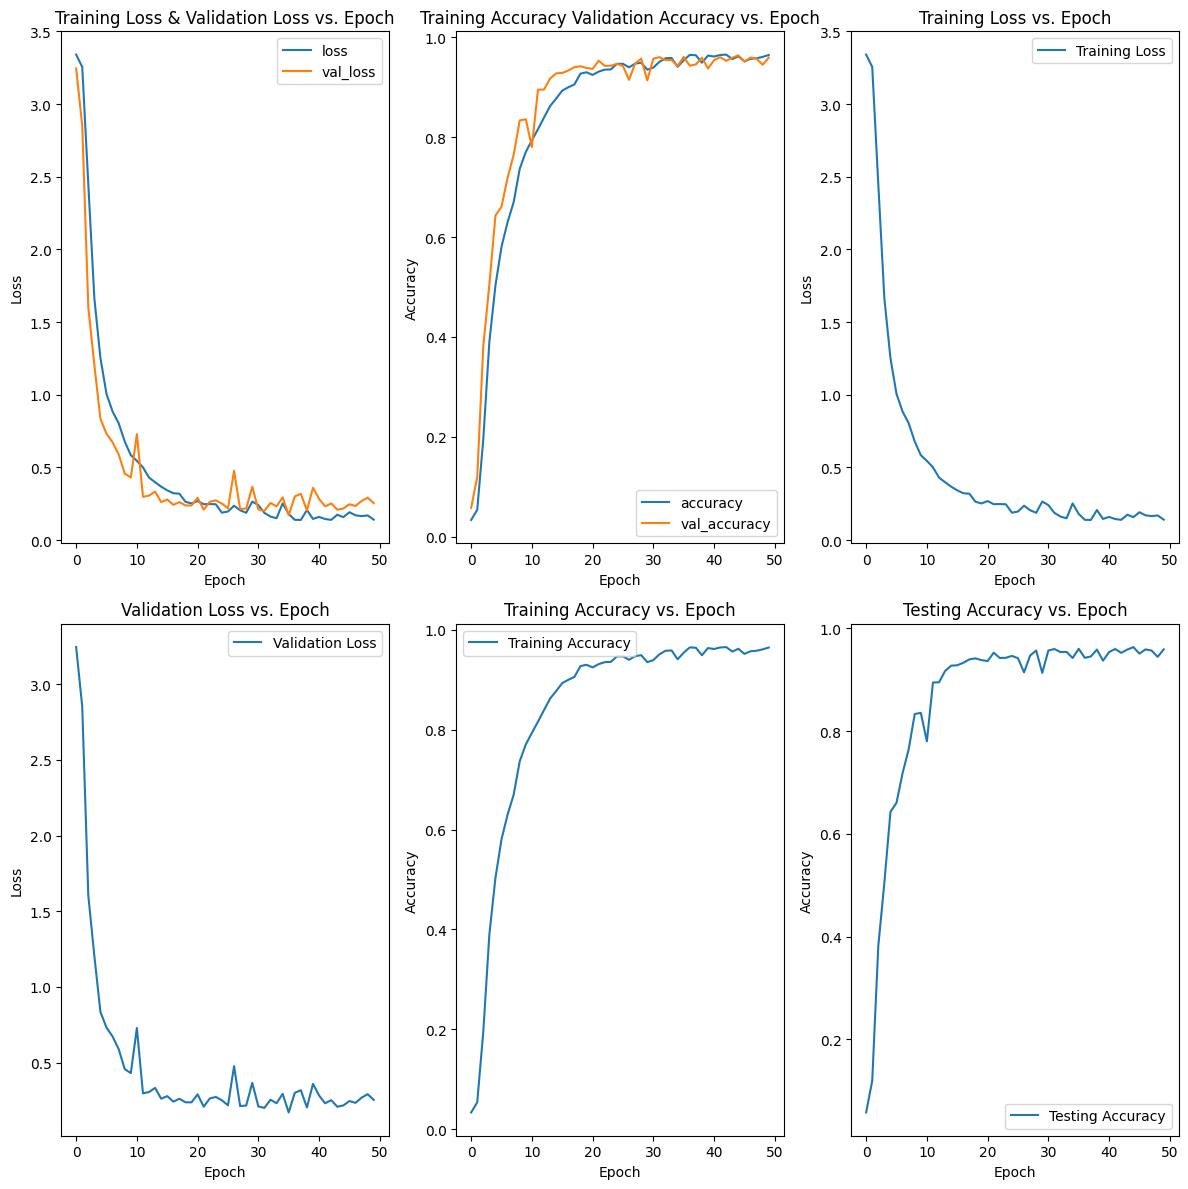

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# Plot Training Loss & Validation Loss vs. Epoch
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss & Validation Loss vs. Epoch')

# Plot Training Accuracy Validation Accuracy vs. Epoch
plt.subplot(2, 3, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy Validation Accuracy vs. Epoch')

# Plot training loss vs. epoch
plt.subplot(2, 3, 3)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs. Epoch')

# Plot validation loss vs. epoch
plt.subplot(2, 3, 4)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Validation Loss vs. Epoch')


# Plot training accuracy vs. epoch
plt.subplot(2, 3, 5)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy vs. Epoch')
# Plot testing accuracy vs. epoch
plt.subplot(2, 3, 6)
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Testing Accuracy vs. Epoch')

# Show the combined figure
plt.tight_layout()
plt.show()

Task 2

In [3]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
# prompt: train the CNN an evaluate the metrics
train_labels_one_hot = to_categorical(train_labels - 1, num_classes=28)
train_data2, val_data, train_labels_one_hot, val_labels_one_hot = train_test_split(
   train_data, train_labels_one_hot, test_size=0.2, shuffle=True
)
history = model.fit(
    datagen.flow(train_data2, train_labels_one_hot),
    epochs=50,
    validation_data=datagen.flow(val_data, val_labels_one_hot),
)


test_labels_one_hot = to_categorical(test_labels - 1, num_classes=28)
test_loss, test_acc = model.evaluate(datagen.flow(test_data, test_labels_one_hot))
print(f'Test accuracy: {test_acc}')
model.save('my_CNN_YD.h5')

Epoch 1/50
336/336 [==============================] - 14s 22ms/step - loss: 3.3377 - accuracy: 0.0392 - val_loss: 3.2871 - val_accuracy: 0.0625
Epoch 2/50
336/336 [==============================] - 8s 22ms/step - loss: 3.0966 - accuracy: 0.0755 - val_loss: 2.6990 - val_accuracy: 0.1034
Epoch 3/50
336/336 [==============================] - 7s 21ms/step - loss: 2.5693 - accuracy: 0.1138 - val_loss: 2.3368 - val_accuracy: 0.1559
Epoch 4/50
336/336 [==============================] - 6s 18ms/step - loss: 2.2831 - accuracy: 0.1740 - val_loss: 2.0051 - val_accuracy: 0.2124
Epoch 5/50
336/336 [==============================] - 7s 21ms/step - loss: 2.0621 - accuracy: 0.2337 - val_loss: 1.7319 - val_accuracy: 0.3400
Epoch 6/50
336/336 [==============================] - 7s 20ms/step - loss: 1.6972 - accuracy: 0.3536 - val_loss: 1.6200 - val_accuracy: 0.4260
Epoch 7/50
336/336 [==============================] - 8s 24ms/step - loss: 1.4778 - accuracy: 0.4314 - val_loss: 1.1336 - val_accuracy: 0.536

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Results

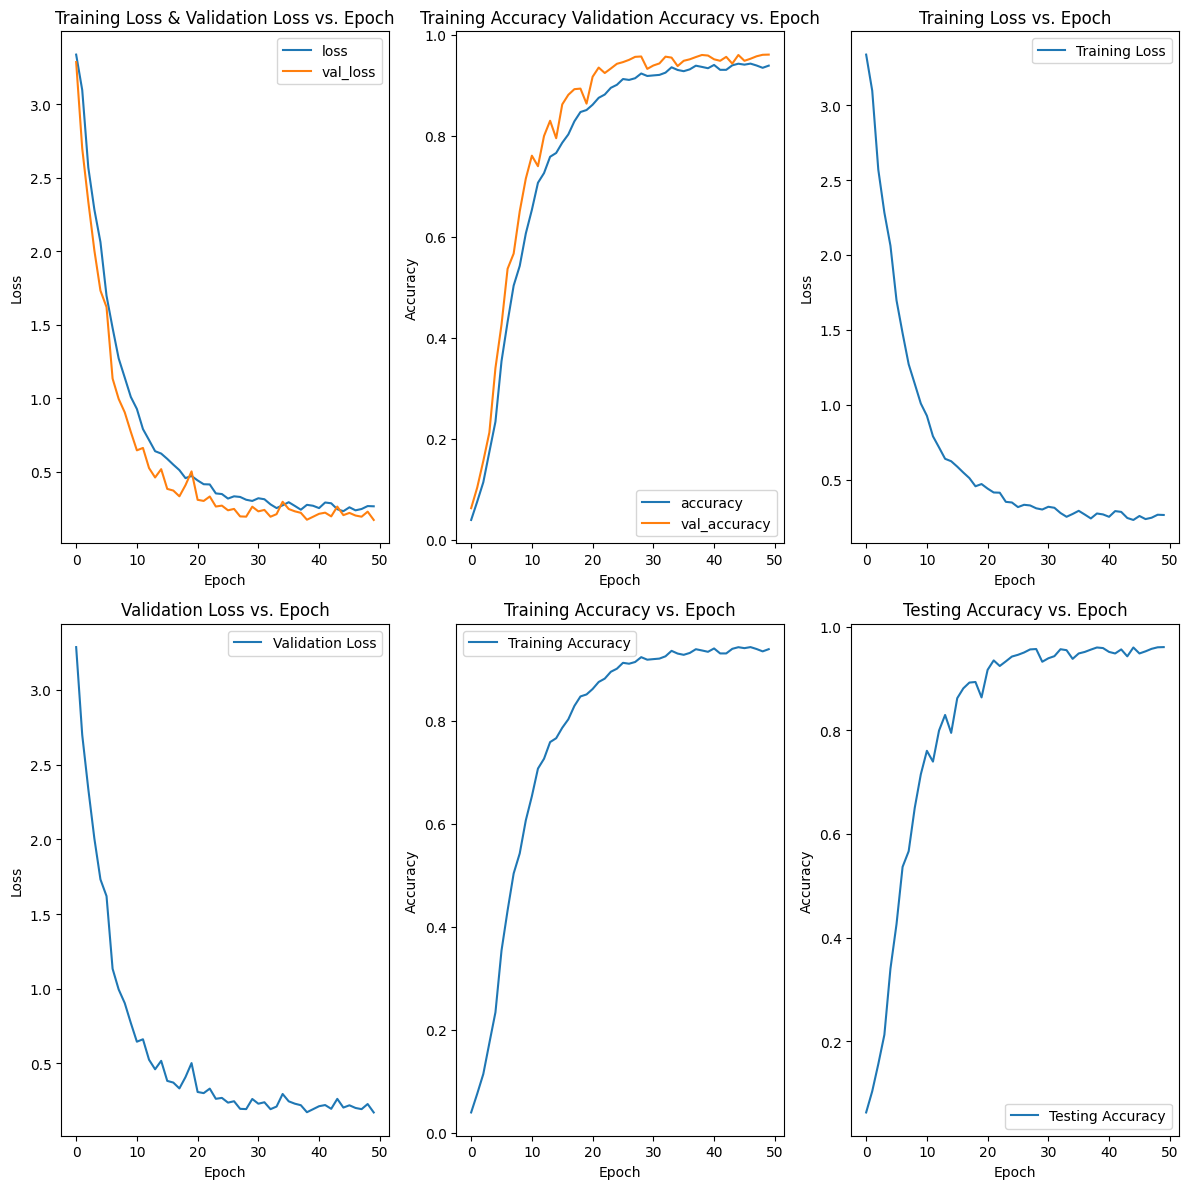

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# Plot Training Loss & Validation Loss vs. Epoch
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss & Validation Loss vs. Epoch')

# Plot Training Accuracy Validation Accuracy vs. Epoch
plt.subplot(2, 3, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy Validation Accuracy vs. Epoch')

# Plot training loss vs. epoch
plt.subplot(2, 3, 3)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs. Epoch')

# Plot validation loss vs. epoch
plt.subplot(2, 3, 4)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Validation Loss vs. Epoch')


# Plot training accuracy vs. epoch
plt.subplot(2, 3, 5)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy vs. Epoch')
# Plot testing accuracy vs. epoch
plt.subplot(2, 3, 6)
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Testing Accuracy vs. Epoch')

# Show the combined figure
plt.tight_layout()
plt.show()

Task 3

In [3]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Reshape
from tensorflow.keras.utils import to_categorical
import pydot
from sklearn.model_selection import train_test_split
# prompt: train the CNN an evaluate the metrics
train_labels_one_hot = to_categorical(train_labels - 1, num_classes=28)
train_data3, val_data, train_labels_one_hot, val_labels_one_hot = train_test_split(
   train_data, train_labels_one_hot, test_size=0.2, shuffle=True
)

train_data_rgb = np.repeat(train_data3, 3, axis=-1)
val_data_rgb = np.repeat(val_data, 3, axis=-1)
print(train_data_rgb.shape)
test_data_rgb = np.repeat(test_data, 3, axis=-1)
print(test_data_rgb.shape)





base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))



model2 = Sequential()
model2.add(base_model)
model2.add(Flatten())
model2.add(Dense(256, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(28, activation='softmax'))
custom_optimizer2 = Adam(learning_rate=0.001)
model2.compile(optimizer=custom_optimizer2, loss='categorical_crossentropy', metrics=['accuracy'])
model2.summary()

history = model2.fit(
    datagen.flow(train_data_rgb, train_labels_one_hot),
    epochs=50,
    validation_data=(val_data_rgb, val_labels_one_hot),
)


test_labels_one_hot = to_categorical(test_labels - 1, num_classes=28)
test_loss, test_acc = model2.evaluate(test_data_rgb, test_labels_one_hot)
print(f'Test accuracy: {test_acc}')
model2.save('my_CNN_ResNet50.h5')

(10751, 32, 32, 3)
(3359, 32, 32, 3)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 256)               524544    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 28)                7196      
                                                                 
Total params: 24119452 (92.01 MB)
Trainable params: 24066332 (91.81 MB)
Non-trainable params: 53120 (207.50 KB)
_____________________________________

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Results

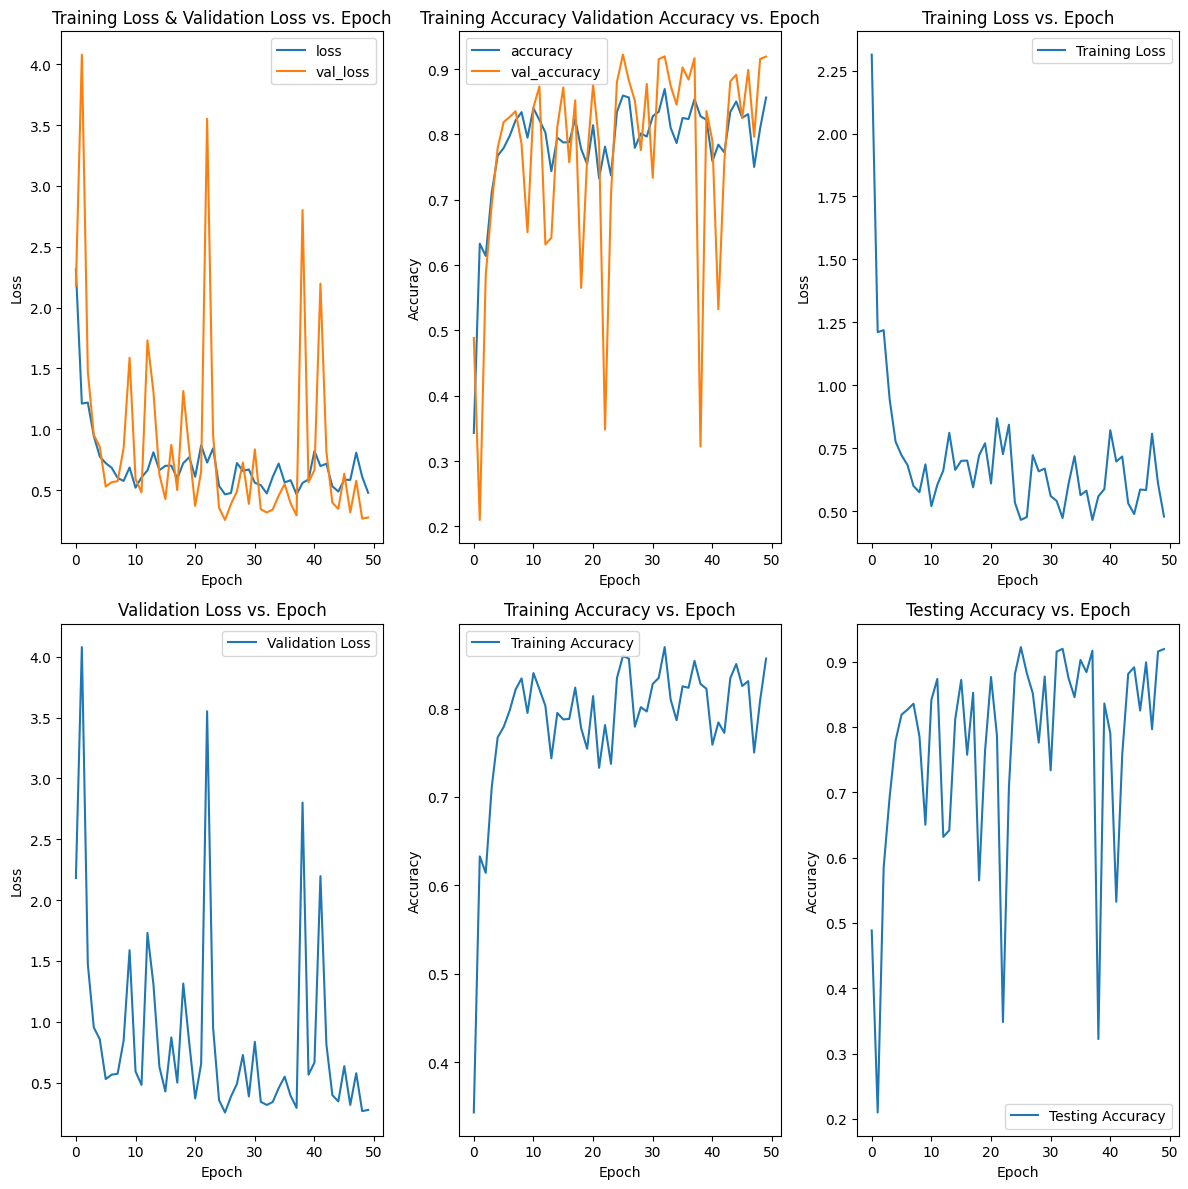

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# Plot Training Loss & Validation Loss vs. Epoch
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss & Validation Loss vs. Epoch')

# Plot Training Accuracy Validation Accuracy vs. Epoch
plt.subplot(2, 3, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy Validation Accuracy vs. Epoch')

# Plot training loss vs. epoch
plt.subplot(2, 3, 3)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs. Epoch')

# Plot validation loss vs. epoch
plt.subplot(2, 3, 4)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Validation Loss vs. Epoch')


# Plot training accuracy vs. epoch
plt.subplot(2, 3, 5)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy vs. Epoch')
# Plot testing accuracy vs. epoch
plt.subplot(2, 3, 6)
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Testing Accuracy vs. Epoch')

# Show the combined figure
plt.tight_layout()
plt.show()

Task 4

In [4]:
import tensorflow as tf
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import json

# Load your pre-trained CNN model from the HDF5 file
with open('precnn.json', 'r') as json_file:
    json_config = json_file.read()

modelp = tf.keras.models.model_from_json(json_config)

# Load the model weights from the HDF5 file
modelp.load_weights('precnn.h5')

modelp.summary()

# Freeze all layers in the pre-trained model
for layer in modelp.layers:
    layer.trainable = False

# Add a new dense layer with the desired number of classes (28 in this case)
num_classes = 28

fine_tuned_model = tf.keras.Sequential([
    modelp,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Split the data
train_data1, val_data, train_labels_one_hot, val_labels_one_hot = train_test_split(
    train_data, to_categorical(train_labels - 1, num_classes=28), test_size=0.2, shuffle=True
)

# Data augmentation for the training set
datagen2 = ImageDataGenerator(
    rescale=1/255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode='wrap'
)




# Repeat RGB channels
train_data_rgb = np.repeat(train_data1, 3, axis=-1)
val_data_rgb = np.repeat(val_data, 3, axis=-1)
test_data_rgb = np.repeat(test_data, 3, axis=-1)

# Compile the model with a custom optimizer
custom_optimizer2 = Adam(learning_rate=0.001)
fine_tuned_model.compile(optimizer=custom_optimizer2, loss='categorical_crossentropy', metrics=['accuracy'])

# Evaluate on the test set before fine-tuning
test_labels_one_hot = to_categorical(test_labels - 1, num_classes=28)
test_loss, test_acc = fine_tuned_model.evaluate(test_data_rgb/255, test_labels_one_hot)
print(f'Initial Test accuracy: {test_acc}')

val_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

# Flow validation and test data using the corresponding data generators
val_data_gen = val_datagen.flow(val_data_rgb, val_labels_one_hot)
test_data_gen = test_datagen.flow(test_data_rgb, test_labels_one_hot)


# Fine-tune the model
history2 = fine_tuned_model.fit(
    datagen2.flow(train_data_rgb, train_labels_one_hot),
    epochs=10,
    validation_data=val_data_gen,
)
for layer in fine_tuned_model.layers:  # Unfreeze the all layers
    layer.trainable = True

custom_optimizer2 = Adam(learning_rate=0.001)
fine_tuned_model.compile(optimizer=custom_optimizer2, loss='categorical_crossentropy', metrics=['accuracy'])

history = fine_tuned_model.fit(
    datagen2.flow(train_data_rgb, train_labels_one_hot),
    epochs=40,
    validation_data=val_data_gen,
)
# Evaluate on the test set after fine-tuning
test_loss, test_acc = fine_tuned_model.evaluate(test_data_gen)
print(f'Final Test accuracy: {test_acc}')
fine_tuned_model.summary()
fine_tuned_model.save('my_CNN_TL.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                 

Results

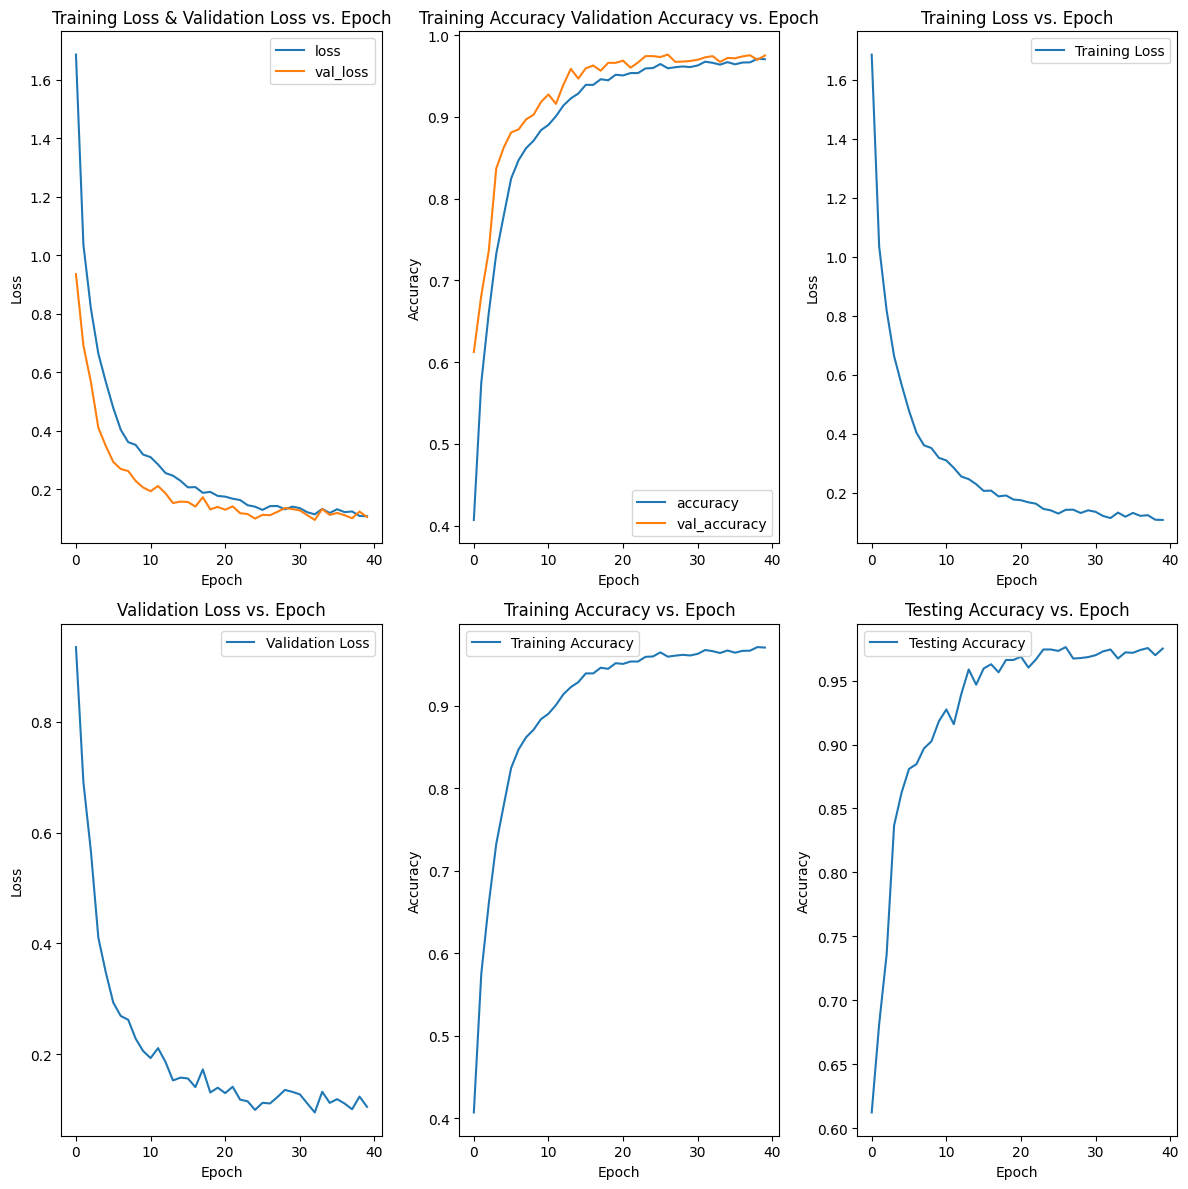

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))

# Plot Training Loss & Validation Loss vs. Epoch
plt.subplot(2, 3, 1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss & Validation Loss vs. Epoch')

# Plot Training Accuracy Validation Accuracy vs. Epoch
plt.subplot(2, 3, 2)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy Validation Accuracy vs. Epoch')

# Plot training loss vs. epoch
plt.subplot(2, 3, 3)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs. Epoch')

# Plot validation loss vs. epoch
plt.subplot(2, 3, 4)
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Validation Loss vs. Epoch')


# Plot training accuracy vs. epoch
plt.subplot(2, 3, 5)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy vs. Epoch')
# Plot testing accuracy vs. epoch
plt.subplot(2, 3, 6)
plt.plot(history.history['val_accuracy'], label='Testing Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Testing Accuracy vs. Epoch')

# Show the combined figure
plt.tight_layout()
plt.show()